In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.express as px


In [2]:
df=pd.read_csv('df_after_clean.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,start_time,end_time,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trip_duration,start_month,data_year,birth_year,member_type
0,2020-04-26 17:45:14,2020-04-26 18:12:03,docked_bike,Eckhart Park,Lincoln Ave & Diversey Pkwy,41.8964,-87.6610,41.9322,-87.6586,1609.0,4,2020,NaN,member
1,2020-04-17 17:08:54,2020-04-17 17:17:03,docked_bike,Drake Ave & Fullerton Ave,Kosciuszko Park,41.9244,-87.7154,41.9306,-87.7238,489.0,4,2020,NaN,member
2,2020-04-01 17:54:13,2020-04-01 18:08:36,docked_bike,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,41.8945,-87.6179,41.8679,-87.6230,863.0,4,2020,NaN,member
3,2020-04-07 12:50:19,2020-04-07 13:02:31,docked_bike,California Ave & Division St,Wood St & Augusta Blvd,41.9030,-87.6975,41.8992,-87.6722,732.0,4,2020,NaN,member
4,2020-04-18 10:22:59,2020-04-18 11:15:54,docked_bike,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,41.8902,-87.6262,41.9695,-87.6547,3175.0,4,2020,NaN,non_member


### Trip duration: member vs non_member

In [4]:
df['trip_duration'].describe()

count    3.011376e+07
mean     1.246782e+03
std      1.828749e+04
min      1.000000e+00
25%      4.200000e+02
50%      7.200000e+02
75%      1.260000e+03
max      1.434004e+07
Name: trip_duration, dtype: float64

In [5]:
df[df['member_type']==0]['trip_duration'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: trip_duration, dtype: float64

In [6]:
df[df['member_type']==1]['trip_duration'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: trip_duration, dtype: float64

<AxesSubplot:xlabel='member_type', ylabel='trip_duration'>

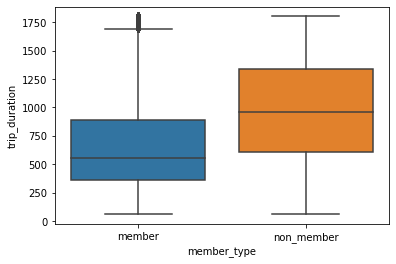

In [7]:
sns.boxplot(data=df[(df['trip_duration']>=60) & (df['trip_duration']<=1800)], y='trip_duration', x='member_type')

### User growth by year: member vs non_member

<AxesSubplot:xlabel='data_year', ylabel='Count'>

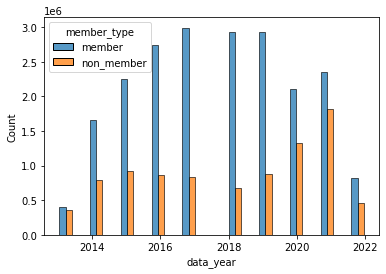

In [47]:
sns.histplot(data=df, x="data_year", hue="member_type",bins=20, multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='data_year', ylabel='Count'>

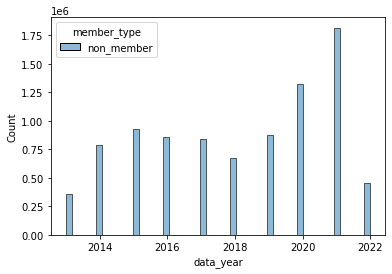

In [41]:
sns.histplot(data=df[df['member_type']=='non_member'], x="data_year", hue="member_type", bins=50)

<AxesSubplot:xlabel='data_year', ylabel='Count'>

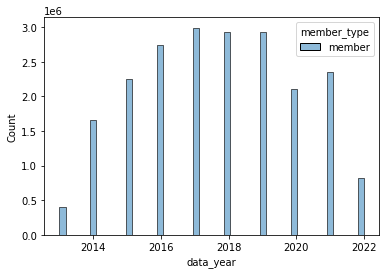

In [42]:
sns.histplot(data=df[df['member_type']=='member'], x="data_year", hue="member_type", bins=50)

### User variation by month: member vs non_member

<AxesSubplot:xlabel='start_month', ylabel='Count'>

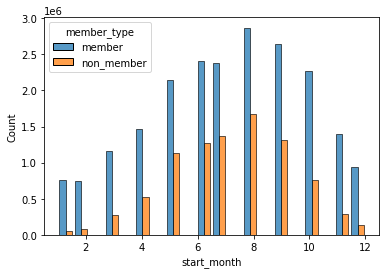

In [48]:
sns.histplot(data=df, x="start_month", hue="member_type", bins=20,multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='start_month', ylabel='Count'>

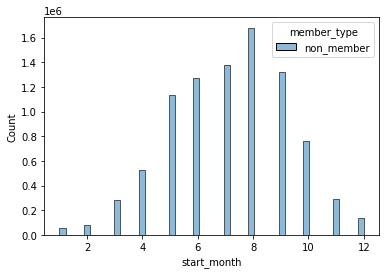

In [44]:
sns.histplot(data=df[df['member_type']=='non_member'], x="start_month", hue="member_type", bins=50)

<AxesSubplot:xlabel='start_month', ylabel='Count'>

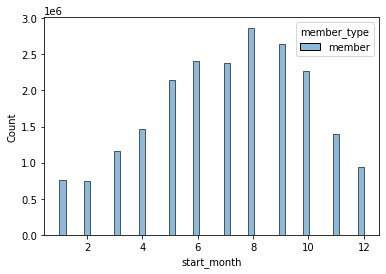

In [39]:
sns.histplot(data=df[df['member_type']=='member'], x="start_month", hue="member_type", bins=50)

### Bike Type: member vs non_member

<AxesSubplot:xlabel='rideable_type', ylabel='Count'>

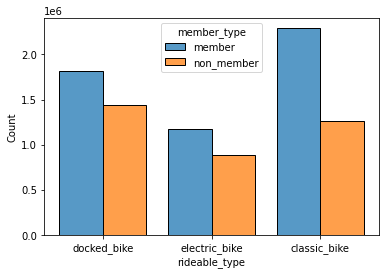

In [14]:
sns.histplot(data=df, x="rideable_type", hue="member_type",multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='rideable_type', ylabel='Count'>

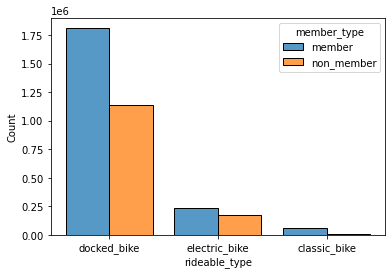

In [15]:
sns.histplot(data=df[df['data_year']==2020], x="rideable_type", hue="member_type",multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='rideable_type', ylabel='Count'>

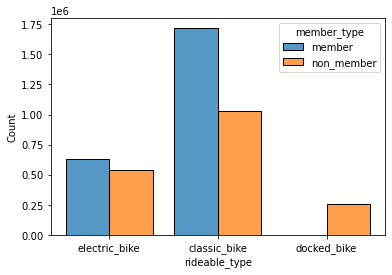

In [16]:
sns.histplot(data=df[df['data_year']==2021], x="rideable_type", hue="member_type",multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='rideable_type', ylabel='Count'>

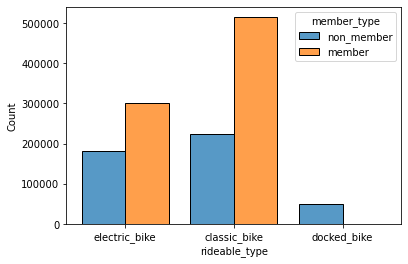

In [17]:
sns.histplot(data=df[df['data_year']==2022], x="rideable_type", hue="member_type",multiple="dodge", shrink=.8)

### Station Frequency: member vs non_member

In [18]:
df['start_end_station_name']=df['start_station_name']+' to '+df['end_station_name']

In [19]:
df['start_end_station_name'].value_counts()

Streeter Dr & Grand Ave to Streeter Dr & Grand Ave           56131
Lake Shore Dr & Monroe St to Lake Shore Dr & Monroe St       49483
Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave         45410
Michigan Ave & Oak St to Michigan Ave & Oak St               38351
Millennium Park to Millennium Park                           29345
                                                             ...  
Sheridan Rd & Loyola Ave to Drake Ave & Montrose Ave             1
Western Ave & Winnebago Ave to N Paulina St & Lincoln Ave        1
Halsted St & Roscoe St to Warren Park East                       1
St. Clair St & Erie St to N Paulina St & Lincoln Ave             1
Halsted St & 18th St to Woodlawn Ave & Lake Park Ave             1
Name: start_end_station_name, Length: 267555, dtype: int64

<AxesSubplot:xlabel='member_type', ylabel='Count'>

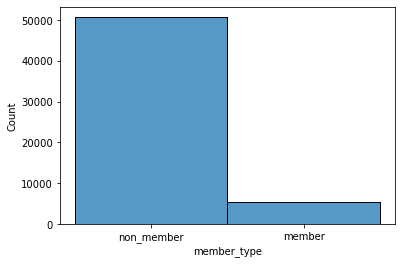

In [20]:
sns.histplot(data=df[df['start_end_station_name']=='Streeter Dr & Grand Ave to Streeter Dr & Grand Ave'], x='member_type')

<AxesSubplot:xlabel='member_type', ylabel='Count'>

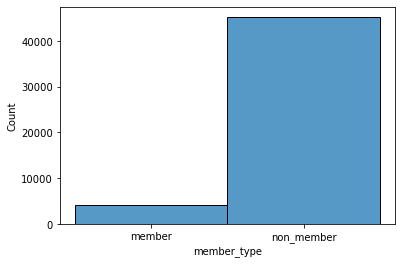

In [50]:
sns.histplot(data=df[df['start_end_station_name']=='Lake Shore Dr & Monroe St to Lake Shore Dr & Monroe St'], x='member_type',bins=100)

<AxesSubplot:xlabel='member_type', ylabel='Count'>

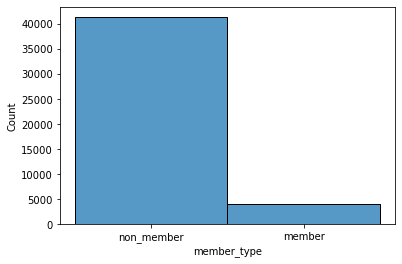

In [22]:
sns.histplot(data=df[df['start_end_station_name']=='Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave'], x='member_type')

<AxesSubplot:xlabel='member_type', ylabel='Count'>

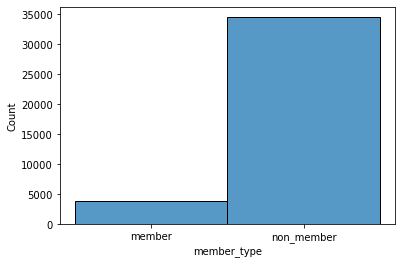

In [23]:
sns.histplot(data=df[df['start_end_station_name']=='Michigan Ave & Oak St to Michigan Ave & Oak St'], x='member_type')

### Birth year: member vs non_member

<AxesSubplot:xlabel='birth_year', ylabel='Count'>

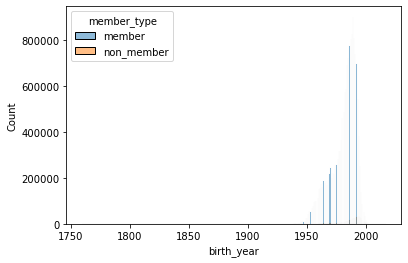

In [24]:
sns.histplot(data=df, x='birth_year',hue='member_type')

<AxesSubplot:xlabel='birth_year', ylabel='Count'>

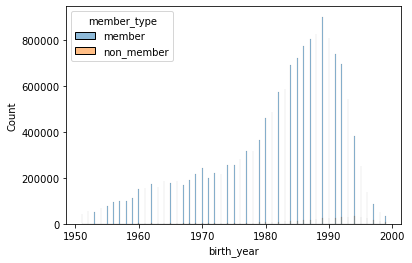

In [25]:
sns.histplot(data=df[(df['birth_year']>1950) & (df['birth_year']<2000)], x='birth_year',hue='member_type')

<AxesSubplot:xlabel='birth_year', ylabel='Count'>

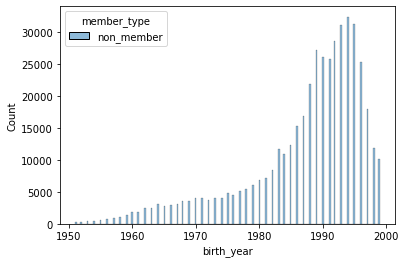

In [29]:
sns.histplot(data=df[(df['birth_year']>1950) & (df['birth_year']<2000) & (df['member_type']=='non_member')], x='birth_year',hue='member_type')

<AxesSubplot:xlabel='birth_year', ylabel='Count'>

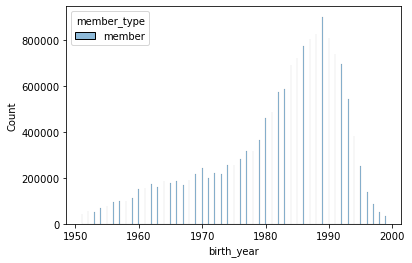

In [30]:
sns.histplot(data=df[(df['birth_year']>1950) & (df['birth_year']<2000) & (df['member_type']=='member')], x='birth_year',hue='member_type')